<h1 align = center-style: 200%; font-family: vazir; color:#0099cc ">
<font face = "vazir" color = "#0099cc">
bike riders
</font>
</h1>
<p dir = LTR style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
Cyclists (🚴) are very sensitive to temperature.The temperature that cyclists feel is usually directly related to wind speeds and humidity.
In this exercise, we have a set of data related to this issue and we intend to analyze it.
</font>
</p>

<h2 align = left style = "line-height: 200%; font-family: vazir; color:#0099cc">
<font face = "vazir" color = "#0099cc">
Data collection
</font>
</h2>

<p dir = RTL style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
In the <code>bikes_borrowed.csv</code> file, the information of bicycles rented in a city on that day is stored. The columns of this collection are explained in the table below. This set is downloaded from the file and stored in the <code>df</code> database.
</font>
</p>


<center>
<div dir = LTR style = "Direction: LTR; Line-Height: 200%; font-Family: vazir; font-size: medium">
<font face = "vazir" size = 3>

|<b> Group Number </b> |<b> Description </b> |
| --- | --- |
|<code> CNT </code> |Number of rented bicycles per day|
|<code> T1 </code> |The actual temperature measured that day|
|<code> T2 </code> |The average temperature that cyclists feel|
|<code> Humidity </COD> |Air moisture on that day|
|<code> Wind_Speed </COD> |Wind speed on that day|
|<code> is_weekend </code> |Is it a non -working day (weekend)|
|<code> Season </code> |Many Season of the Year |
|<code> Cloud </COD> |Is the weather cloudy on that day

</font>
</ div>
</set>

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA

df = pd.read_csv('bikes_borrowed.csv')
df.head()

,cnt,t1,t2,humidity,wind_speed,is_weekend,season,cloud
0,182,3.0,2.0,93.0,6.0,1,3,0.0
1,138,3.0,2.5,93.0,5.0,1,3,NaN
2,134,2.5,2.5,96.5,0.0,1,3,NaN
3,72,2.0,2.0,100.0,0.0,1,3,1.0
4,47,2.0,0.0,93.0,6.5,1,3,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cnt         17414 non-null  int64  
 1   t1          17409 non-null  float64
 2   t2          17409 non-null  float64
 3   humidity    15694 non-null  float64
 4   wind_speed  17409 non-null  float64
 5   is_weekend  17414 non-null  int64  
 6   season      17414 non-null  int64  
 7   cloud       889 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 1.1 MB


<h2 align = center-style: 200%; font-family: vazir; color:#0099cc ">
<font face = "vazir" color = "#0099cc">
Missing values
</font>
</h2>


<p dir = "LTR style =" Direction: LTR; text-align: justify; line-height: 200%; font-font: vazir; font-size: medium ">
<font face = "vazir" size = 3>
As it is clear from the first rows of dataphia, this set contains a number of lost values.In this section we try to manage these lost values in different ways.
<br>
First, check that a few percent of the values of each column are missing.If many of the values of a lost column are probably, that column will probably not provide us with much information, so we can delete it in general.
</font>
</p>

In [3]:
missing_percentages = df.isnull().mean() 
print(missing_percentages)

cnt           0.000000
t1            0.000287
t2            0.000287
humidity      0.098771
wind_speed    0.000287
is_weekend    0.000000
season        0.000000
cloud         0.948949
dtype: float64


<p dir = "LTR style =" Direction: LTR; text-align: justify; line-height: 200%; font-font: vazir; font-size: medium ">
<font face = "vazir" size = 3>
Now the column whose number of lost values is very high
(More than 9 %)
Remove.
</font>
</p>

In [4]:
df.isnull().mean() > .9

cnt           False
t1            False
t2            False
humidity      False
wind_speed    False
is_weekend    False
season        False
cloud          True
dtype: bool

In [5]:
df.drop(missing_percentages[missing_percentages > .9].index, axis=1 , inplace=True)

df.head()

,cnt,t1,t2,humidity,wind_speed,is_weekend,season
0,182,3.0,2.0,93.0,6.0,1,3
1,138,3.0,2.5,93.0,5.0,1,3
2,134,2.5,2.5,96.5,0.0,1,3
3,72,2.0,2.0,100.0,0.0,1,3
4,47,2.0,0.0,93.0,6.5,1,3


<p dir = LTR style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
Now, according to the calculation of the percentage of lost values in each column, we know that the column
<code>Humidity</code> It also has a significant number of lost values.To solve this problem, we want these values with an average value <code> Humidity </code> Replace.
<br>
</font>
</p>

In [6]:
mean = df['humidity'].mean()
print(f"mean: {int(mean)}")
df.humidity.fillna(mean.astype('int'), inplace= True)

mean: 72


In [7]:
df.humidity.isnull().sum()

0

<p dir = "LTR style =" Direction: LTR; text-align: justify; line-height: 200%; font-font: vazir; font-size: medium ">
<font face = "vazir" size = 3>
Finally, given that the rest of the columns have a very small amount of lost values, we remove all samples/rows that are still lost.
</font>
</p>

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

cnt           0
t1            0
t2            0
humidity      0
wind_speed    0
is_weekend    0
season        0
dtype: int64

<p dir = "LTR style =" Direction: LTR; text-align: justify; line-height: 200%; font-font: vazir; font-size: medium ">
<font face = "vazir" size = 3>
    As you can see, the names of <code> T1 </code> and <code> t2 </code> are very general and do not mean their value, so it is good to change their names.
<br>
    In the following cell, change the name of <code> t1 </code> to <code> t_real </code> and the name of the <code> t2 </code> column name to <code> t_feels_like </code>.
</font>
</p>

In [10]:
df.columns = ['cnt', 't_real', 't_feels_like', 'humidity', 'wind_speed', 'is_weekend', 'season']
df.head()

,cnt,t_real,t_feels_like,humidity,wind_speed,is_weekend,season
0,182,3.0,2.0,93.0,6.0,1,3
1,138,3.0,2.5,93.0,5.0,1,3
2,134,2.5,2.5,96.5,0.0,1,3
3,72,2.0,2.0,100.0,0.0,1,3
4,47,2.0,0.0,93.0,6.5,1,3


<h2 align = left style = "line-height: 200%; font-family: vazir; color:#0099cc">
<font face = "vazir" color = "#0099cc">
Exploration in Data </font>
</h2>

<p dir = LTR style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
To check data first of
<code>Describe</code>
We use to understand a whole data.
</font>
</p>

In [11]:
df.describe()

,cnt,t_real,t_feels_like,humidity,wind_speed,is_weekend,season
count,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000
mean,1143.131311,12.469633,11.522622,72.279755,15.914560,0.285485,1.491872
std,1084.840175,5.570946,6.614235,13.598632,7.895017,0.451658,1.118833
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,64.500000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,72.000000,15.000000,0.000000,1.000000
75%,1672.000000,16.000000,16.000000,82.000000,20.500000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,3.000000


<p dir = LTR style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
Now using
<code> plt.scatter </code>
Examine that the connection between
<code> t_real </code>
And
<code> t_feels_Like </code>
How is that.
</font>
</p>

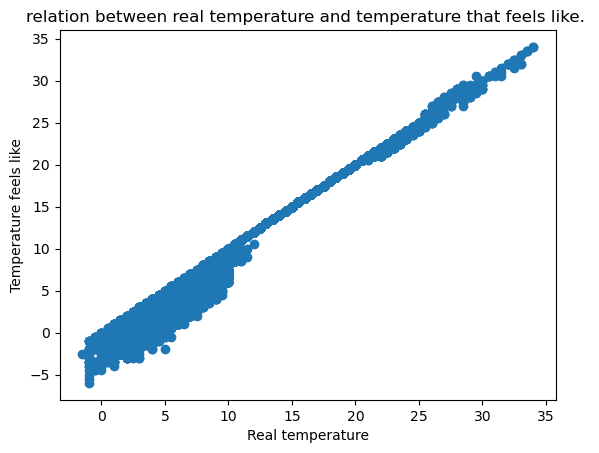

In [12]:
from matplotlib  import pyplot as plt

plt.scatter(x= df.t_real, y= df.t_feels_like) 
plt.xlabel("Real temperature")
plt.ylabel("Temperature feels like")
plt.title("relation between real temperature and temperature that feels like. ")
plt.savefig('plot1.png')

plt.show()

<p dir = LTR style = "Direction: LTR; Text-Align: Justim; Line-Height: 200%; Font-Family: Vazir; Font-Size: Medium">
<font face = "vazir" size = 3>
As we are expecting and expecting it, the two are very close to most days.
<br>
Next, we want to know what the number of rental bike rentals and air temperature are.
</font>
</p>

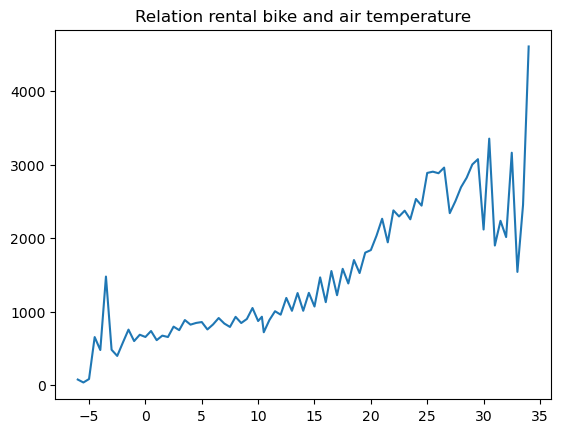

In [13]:
grouped =  df.groupby('t_feels_like')['cnt'].apply('mean') 

plt.plot(grouped)
plt.title("Relation rental bike and air temperature")
plt.savefig('plot2.png')
plt.show()